### Missing Indicators
Two main analyses of this kernel are outlier and missing value cleaning: 



In [1]:
# Loading packges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Loading data
train = pd.read_csv('application_train.csv')
test = pd.read_csv('application_test.csv')

In [3]:
# Check the number of rows and columns 
print('Train data: ', train.shape, '\nTest data: ', test.shape)

Train data:  (307511, 122) 
Test data:  (48744, 121)


In [4]:
# First five rows of train
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Last five rows of train
train.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [6]:
# Check data types of train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# Split column names
cols_half1 = train.columns[:30]
cols_half2 = train.columns[30:60]
cols_half3 = train.columns[60:90]
cols_half4 = train.columns[90:122]

In [8]:
# Summary table of numeric columns 1
train[cols_half1].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,9.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000


In [9]:
# Summary table of numeric columns 2
train[cols_half2].describe()

,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,...,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000
mean,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,...,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543
std,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,...,0.100049,0.144641,0.161380,0.081184,0.092576,0.110565,0.047732,0.069523,0.107936,0.084307
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014568,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.334007,...,0.069000,0.166700,0.083300,0.018700,0.050400,0.045300,0.000000,0.000000,0.052500,0.040700
50%,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.505998,...,0.137900,0.166700,0.208300,0.048100,0.075600,0.074500,0.000000,0.003600,0.084000,0.074600
75%,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.675053,...,0.206900,0.333300,0.375000,0.085600,0.121000,0.129900,0.003900,0.027700,0.143900,0.112400
max,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.962693,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Summary table of numeric columns 3
train[cols_half3].describe()

,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,...,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE
count,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,...,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000
mean,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,...,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547
std,0.064575,0.110111,0.074445,0.132256,0.100977,0.143709,0.161160,0.081750,0.097880,0.111845,...,0.134467,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.976700,0.699400,0.007200,0.000000,0.069000,0.166700,0.083300,0.016600,0.054200,0.042700,...,0.000000,0.069000,0.166700,0.083300,0.018700,0.051300,0.045700,0.000000,0.000000,0.041200
50%,0.981600,0.764800,0.019000,0.000000,0.137900,0.166700,0.208300,0.045800,0.077100,0.073100,...,0.000000,0.137900,0.166700,0.208300,0.048700,0.076100,0.074900,0.000000,0.003100,0.068800
75%,0.986600,0.823600,0.049000,0.120800,0.206900,0.333300,0.375000,0.084100,0.131300,0.125200,...,0.120000,0.206900,0.333300,0.375000,0.086800,0.123100,0.130300,0.003900,0.026600,0.127600
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Summary table of numeric columns 4
train[cols_half4].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,348.000000,34.000000,344.000000,24.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [12]:
# Frequencies of TARGET
target_counts = train.TARGET.value_counts(dropna = False)
target_frac = target_counts[1] / len(train.TARGET) 
target_perc = round(target_counts[1] / len(train.TARGET) * 100, 1)
print('Target counts: \n', target_counts, '\n\nTarget percent:', target_perc )

Target counts: 
 0    282686
1     24825
Name: TARGET, dtype: int64 

Target percent: 8.1


In [13]:
# Frequencies of catrgorical variables
print(train.NAME_CONTRACT_TYPE.value_counts(dropna = False),
     '\n\n', train.CODE_GENDER.value_counts(dropna = False),
     '\n\n', train.FLAG_OWN_CAR.value_counts(dropna = False),
     '\n\n', train.FLAG_OWN_REALTY.value_counts(dropna = False))

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64 

 F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64 

 N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64 

 Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


### Manage outliers

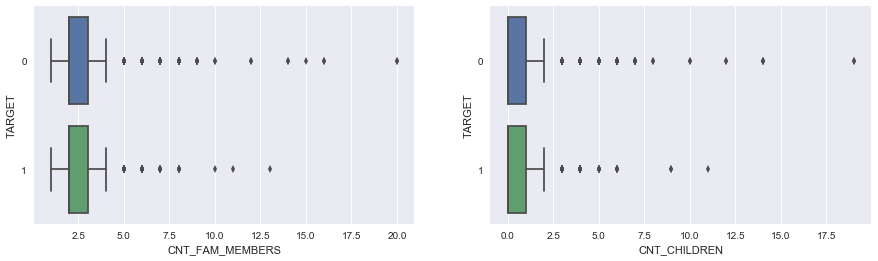

In [14]:
# Family size
sns.set()
f, axes = plt.subplots(1, 2, figsize = (15, 4))
sns.boxplot(x = 'CNT_FAM_MEMBERS', y = 'TARGET', orient = 'h', data = train, ax = axes[0])
sns.boxplot(x = 'CNT_CHILDREN', y = 'TARGET', orient = 'h', data = train, ax = axes[1])
#plt.savefig('Boxplots of family size.png')
plt.show()

There seem large-size families with many children.  The mximum number of family size (20) and the one of children (19) are unusual but still can be happen - so we do reserve those values.

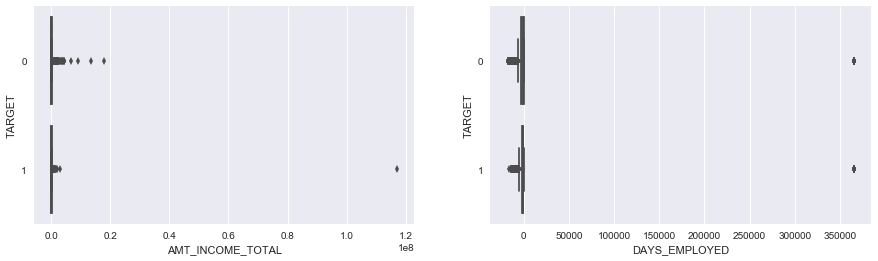

In [15]:
# Boxplots of monthly income and length of emplyeement [0]
sns.set()
f, axes = plt.subplots(1, 2, figsize = (15, 4))
sns.boxplot(x = 'AMT_INCOME_TOTAL', y = 'TARGET', orient = 'h', data = train, ax = axes[0])
sns.boxplot(x = 'DAYS_EMPLOYED', y = 'TARGET', orient = 'h', data = train, ax = axes[1])
#plt.savefig('Boxplots of income and employment length.png')
plt.show()

The maximum income of 1.17e+08 could be an error that was typed with extra zero(s).  We replace this with null. 

The days of employment denoted with negative number representing the backward counting from the day of application - so the positive value of 365243 days representing 1000 years in future is suspicious. We found that their major income sources is pension, so we replace those values with null. In the same manner, all columns representing days would be implemented. 

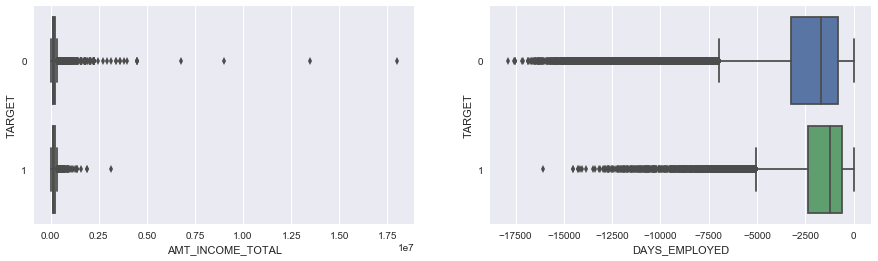

In [16]:
# Replace the income outlier with null
high_incomes = train[train.AMT_INCOME_TOTAL > 100000000]
train.loc[train.AMT_INCOME_TOTAL > 100000000, 'AMT_INCOME_TOTAL'] = np.nan
test.loc[test.AMT_INCOME_TOTAL > 100000000, 'AMT_INCOME_TOTAL'] = np.nan

# Replace the positive number of  days of employments with null
train.loc[train.DAYS_EMPLOYED > 0, 'DAYS_EMPLOYED'] = np.nan
test.loc[test.DAYS_EMPLOYED > 0, 'DAYS_EMPLOYED'] = np.nan

# Boxplots of monthly income and length of emplyeement [1]
sns.set()
f, axes = plt.subplots(1, 2, figsize = (15, 4))
sns.boxplot(x = 'AMT_INCOME_TOTAL', y = 'TARGET', orient = 'h', data = train, ax = axes[0])
sns.boxplot(x = 'DAYS_EMPLOYED', y = 'TARGET', orient = 'h', data = train, ax = axes[1])
#plt.savefig('Boxplots of income and employment length after implementation.png')
plt.show()

In [17]:
# Columns have days
day_cols = [col for col in train.columns if 'DAYS' in col]
day_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [18]:
# Summary of these columns for train
train[day_cols].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,252137.000000,307511.000000,307511.000000,307510.000000
mean,-16036.995067,-2384.169325,-4986.120328,-2994.202373,-962.858788
std,4363.988632,2338.360162,3522.886321,1509.450419,826.808487
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-3175.000000,-7479.500000,-4299.000000,-1570.000000
50%,-15750.000000,-1648.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-767.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
# Summary of these columns for test
test[day_cols].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,48744.000000,39470.000000,48744.000000,48744.000000,48744.000000
mean,-16068.084605,-2476.738941,-4967.652716,-3051.712949,-1077.766228
std,4325.900393,2307.963913,3552.612035,1569.276709,878.920740
min,-25195.000000,-17463.000000,-23722.000000,-6348.000000,-4361.000000
25%,-19637.000000,-3328.750000,-7459.250000,-4448.000000,-1766.250000
50%,-15785.000000,-1765.000000,-4490.000000,-3234.000000,-863.000000
75%,-12496.000000,-861.000000,-1901.000000,-1706.000000,-363.000000
max,-7338.000000,-1.000000,0.000000,0.000000,0.000000


There are four more columns describing days, but the only one column DAYS_EMPLOYED has outliers in both train and test data. We implemented both datasets with replacing the null values.  

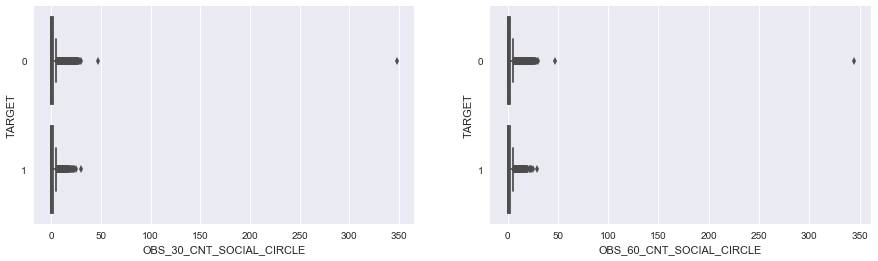

In [20]:
# Boxplots of social circles [0]
sns.set()
f, axes = plt.subplots(1, 2, figsize = (15, 4))
sns.boxplot(x = 'OBS_30_CNT_SOCIAL_CIRCLE', y = 'TARGET', orient = 'h', data = train, ax = axes[0])
sns.boxplot(x = 'OBS_60_CNT_SOCIAL_CIRCLE', y = 'TARGET', orient = 'h', data = train, ax = axes[1])
#plt.savefig('Boxplots of social circles.png')
plt.show()

One value counts 344 social circles in 60 days as well as in 30 days - it is extreme comparing the most values under 50 and we replace this with null in both columns.

In [21]:
# Check the values
larg_sco = train[train.OBS_30_CNT_SOCIAL_CIRCLE > 50]
larg_sco.OBS_60_CNT_SOCIAL_CIRCLE.value_counts()

344.0    1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

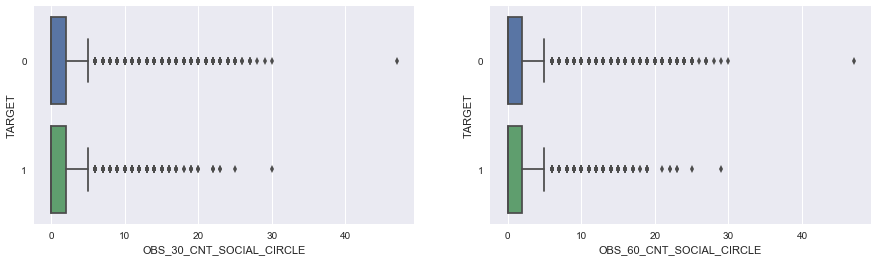

In [22]:
# replace this value with null
train.loc[train.OBS_30_CNT_SOCIAL_CIRCLE > 50, ['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE']] = np.nan
test.loc[test.OBS_30_CNT_SOCIAL_CIRCLE > 50, ['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE']] = np.nan

# Boxplots of social circles [1]
sns.set()
f, axes = plt.subplots(1, 2, figsize = (15, 4))
sns.boxplot(x = 'OBS_30_CNT_SOCIAL_CIRCLE', y = 'TARGET', orient = 'h', data = train, ax = axes[0])
sns.boxplot(x = 'OBS_60_CNT_SOCIAL_CIRCLE', y = 'TARGET', orient = 'h', data = train, ax = axes[1])
#plt.savefig('Boxplots of social circles after implementation.png')
plt.show()

### There are some variables with large missing values - so check these

In [23]:
# Function for computing the percent of missing
def missing_perc(data):
    missing_counts = data.isnull().sum()
    return round(missing_counts / len(data) * 100, 1)

# Function for the percent of target == 1 among missing
def missing_target_perc(data, target):
    idx = np.where(data.isnull() & target)
    idx_na = np.where(data.isnull())
    if len(idx_na[0]) == 0:
        return 0.0
    else:
        return round(len(idx[0]) / len(idx_na[0]) * 100, 1)
    
# Function for the percent of target == 1 among no-missing
def no_missing_target_perc(data, target):
    idx = np.where((data.isnull() == 0) & target)
    idx_no_na = np.where(data.isnull() == 0)
    return round(len(idx[0]) / len(idx_no_na[0]) * 100, 1)

In [24]:
# Missing-value, target == 1 among missing, target == 1 among no-missing percents
tr_data = train.drop('TARGET', axis = 1) # drop TARGET column
tr_target = train.TARGET # only TARGET column
ms_percs = np.empty(len(tr_data.columns)) # initialise array for missing
ms_tg_percs = np.empty(len(tr_data.columns)) # initialise for msiing and target
no_ms_tg_percs = np.empty(len(tr_data.columns)) # initialise for no-msiing and target
i = -1

for col in tr_data.columns:
    i += 1
    data = tr_data[col]
    ms_percs[i] = missing_perc(data)
    ms_tg_percs[i] = missing_target_perc(data, tr_target)
    no_ms_tg_percs[i] = no_missing_target_perc(data, tr_target)

In [25]:
# Top 50 missing variables with three coulumns of our interest
df_percs = pd.DataFrame(tr_data.columns)
df_percs.columns = ['variable']
df_percs['na_percent'] = ms_percs
df_percs['na_target_percent'] = ms_tg_percs
df_percs['no_na_target_percent'] = no_ms_tg_percs
df_percs = df_percs.sort_values(by = ['na_percent'], ascending = False)
df_percs_50 = df_percs[:50]

df_percs_50

,variable,na_percent,na_target_percent,no_na_target_percent
61,COMMONAREA_MODE,69.9,8.6,6.9
75,COMMONAREA_MEDI,69.9,8.6,6.9
47,COMMONAREA_AVG,69.9,8.6,6.9
83,NONLIVINGAPARTMENTS_MEDI,69.4,8.6,6.9
55,NONLIVINGAPARTMENTS_AVG,69.4,8.6,6.9
69,NONLIVINGAPARTMENTS_MODE,69.4,8.6,6.9
53,LIVINGAPARTMENTS_AVG,68.4,8.6,6.9
67,LIVINGAPARTMENTS_MODE,68.4,8.6,6.9
81,LIVINGAPARTMENTS_MEDI,68.4,8.6,6.9
85,FONDKAPREMONT_MODE,68.4,8.6,6.9


C:\Users\dpark\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


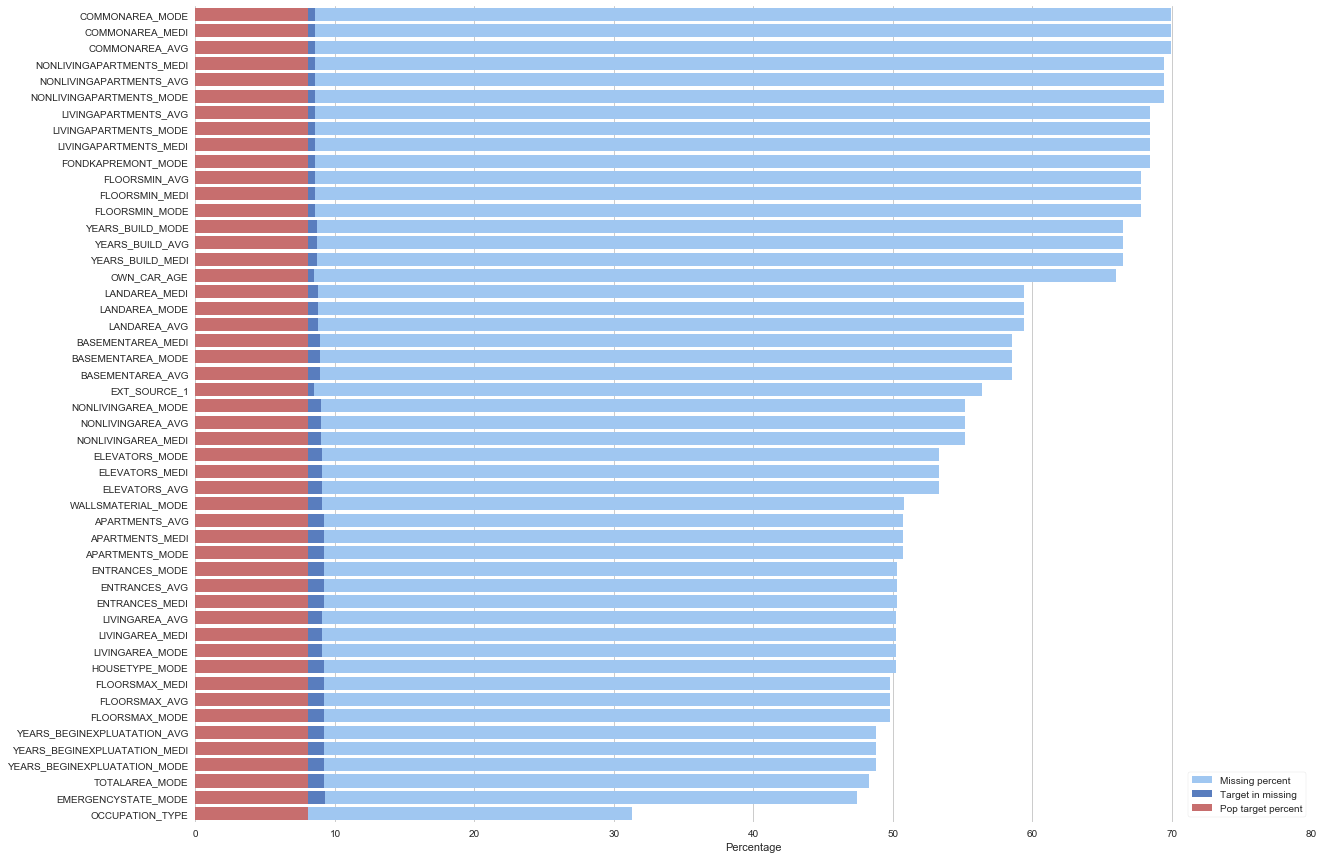

In [26]:
# Visualise the most missing variables with its percent and target percent
sns.set(style = 'whitegrid')
f, ax = plt.subplots(figsize = (20, 15)) # initialise the matplot plane

# New column indication the the total TARGET percent
df_percs_50['target_percent'] = target_perc 

# Plot missing percent
_ = sns.set_color_codes('pastel')
_ = sns.barplot(x = 'na_percent', y = 'variable', data = df_percs_50, 
                label = 'Missing percent', color = 'b')

# Plot percent of TARGET == 1 among missing
_ = sns.set_color_codes('muted')
_ = sns.barplot(x = 'na_target_percent',  y = 'variable', data = df_percs_50, 
                label = 'Target in missing', color = 'b')

# Plot percent of TARGET == 1 among missing
_ = sns.set_color_codes('muted')
_ = sns.barplot(x = 'target_percent',  y = 'variable', data = df_percs_50, 
                label = 'Pop target percent', color = 'r')

# Add a legend and informative axis label
ax.legend(ncol = 1, loc = "lower right", frameon = True)
ax.set(xlim =(0, 80), ylabel = "",
       xlabel = "Percentage")
sns.despine(left = True, bottom = True)
plt.margins(.02)
#plt.savefig('percent_missing_target.png')
plt.show()

In [27]:
# Function for Chi-square test
def chi_sq_test(data, target):
    """ Find any significant diffence in target values ("No_risk" or "Risk") 
        between missing and non-missing groups of data """
    
    # Contegency table
    cross_tab = pd.crosstab(data.isnull(), target)
    cross_tab.columns = ['No_risk', 'Risk']
    cross_tab.index = ['No_missing', 'Missing']
    cross_tab['prob'] = cross_tab.Risk / (cross_tab.No_risk + cross_tab.Risk)
    ct = cross_tab[['No_risk', 'Risk']] # table without prob column   
    
    # Probabilities of 'Risk' for no-missing, missing and population
    no_na_p = cross_tab.prob[0]
    na_p = cross_tab.prob[1]
    pop_p = target_frac
    
    # Chi-squre statistic
    observed = ct.Risk
    expected = ct.sum(axis = 1) * pop_p
    chi_sq = ((observed - expected) ** 2 / expected).sum().sum()
    
    # Margin-of-error, 95% confidence interva and p-vlaue
    se = np.sqrt(np.sum([no_na_p * (1 - no_na_p) / ct.sum(axis = 1)[0], na_p * (1 - na_p) / ct.sum(axis = 1)[1]]))
    margin_of_error = stats.norm.ppf(.975) * se
    conf_int_95 = [pop_p - margin_of_error, pop_p + margin_of_error]
    p = 1 - stats.chi2.cdf(chi_sq, df = 1)
    
    return(p)

In [28]:
# Compute p-values of Chi-squre tests
df_missing = df_percs.loc[df_percs.na_percent > 0]
chi_sq_p = np.empty(len(df_missing.variable)) # initialise array

for i in range(len(df_missing.variable)):
    col = list(df_missing.variable)[i]
    data = tr_data[col]
    chi_sq_p[i] = chi_sq_test(data, tr_target)
    
chi_sq_p = pd.DataFrame(chi_sq_p)
chi_sq_p.columns = ['p_value']
chi_sq_p.index = df_missing.variable
sig_na_cols =  list(chi_sq_p[chi_sq_p.p_value <= .05].index)

# p-values less than 0.05
print('p_value of less than 0.05: ', sum(chi_sq_p.p_value <= .05), '\nTotal missing: ', len(chi_sq_p.p_value),
     '\nPercent of significance: ', round(sum(chi_sq_p.p_value <= .05) /len(chi_sq_p.p_value) * 100, 2))

p_value of less than 0.05:  63 
Total missing:  65 
Percent of significance:  96.92


In [167]:
# List of variables that their missingness affect TARGET significantly  
sig_na_cols

['COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'COMMONAREA_MEDI',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MODE',
 'FONDKAPREMONT_MODE',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_AVG',
 'LANDAREA_MODE',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MODE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE',
 'LIVINGAREA_MODE',
 'LIVINGAREA_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATIO

### We implement new variables indicating missingness for train amd test datasets later

### Correlations

In [29]:
# Compute the correlation matrix for train data
corr = train.drop('SK_ID_CURR', axis = 1).corr()
corr.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,1.000000,0.019187,-0.020460,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,0.074958,0.041975,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,0.019187,1.000000,0.025254,0.002145,0.021374,-0.001827,-0.025573,0.330938,0.061145,0.183395,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.020460,0.025254,1.000000,0.342170,0.417884,0.348698,0.165577,0.056669,-0.032221,0.062354,...,0.007137,0.005333,0.000606,-0.001219,0.002058,0.007449,0.006543,0.061472,0.013287,0.030573
AMT_CREDIT,-0.030369,0.002145,0.342170,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.091295,0.009621,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
AMT_ANNUITY,-0.012817,0.021374,0.417884,0.770138,1.000000,0.775109,0.118429,0.009445,-0.053604,0.038514,...,-0.009745,0.004573,0.011718,-0.017598,0.003861,0.002185,0.013881,0.039148,0.010124,-0.011320


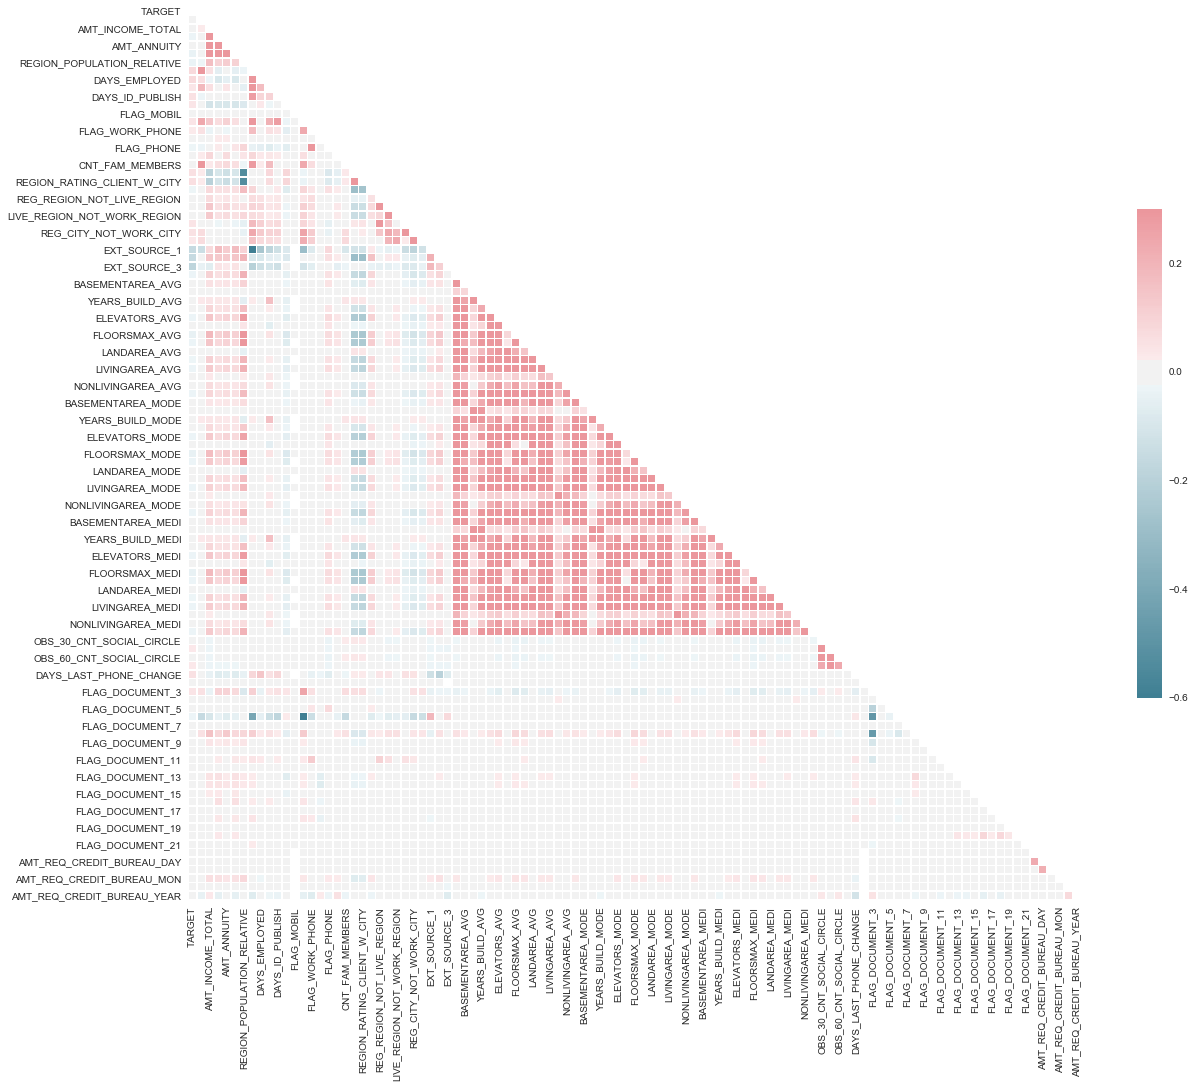

In [30]:
# Plot heatmap
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib plane
f, ax = plt.subplots(figsize = (20, 18))

# Customise a diversing colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.margins(.02)
#plt.savefig('corr_train.png')
plt.show()

In [31]:
# List of abs(crrelation coefficient) less than 0.02
corr_target = corr.TARGET
low_corr_cols = list(corr.index[(corr_target > -.02 ) & (corr_target <= .02)])
low_corr_cols

['CNT_CHILDREN',
 'AMT_ANNUITY',
 'FLAG_MOBIL',
 'FLAG_CONT_MOBILE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'YEARS_BEGINEXPLUATATION_AVG',
 'COMMONAREA_AVG',
 'ENTRANCES_AVG',
 'LANDAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'COMMONAREA_MODE',
 'ENTRANCES_MODE',
 'LANDAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'COMMONAREA_MEDI',
 'ENTRANCES_MEDI',
 'LANDAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMEN

In [32]:
# Remove these low_corr_cols and add significant missing indicator columns for train and test
train_1 = train.drop(low_corr_cols, axis = 1) # remove columns for train

for col in sig_na_cols: # add columns for train
    col_name = 'NA_IND_' + col
    train_1[col_name] = train[col].isnull()

test_1 = test.drop(low_corr_cols, axis = 1) # remove columns fro test

for col in sig_na_cols: # add columns for test
    col_name = 'NA_IND_' + col
    test_1[col_name] = test[col].isnull()

print('Train rows and columns: ', train_1.shape, '\nTest row and colulmns: ', test_1.shape)

Train rows and columns:  (307511, 131) 
Test row and colulmns:  (48744, 130)


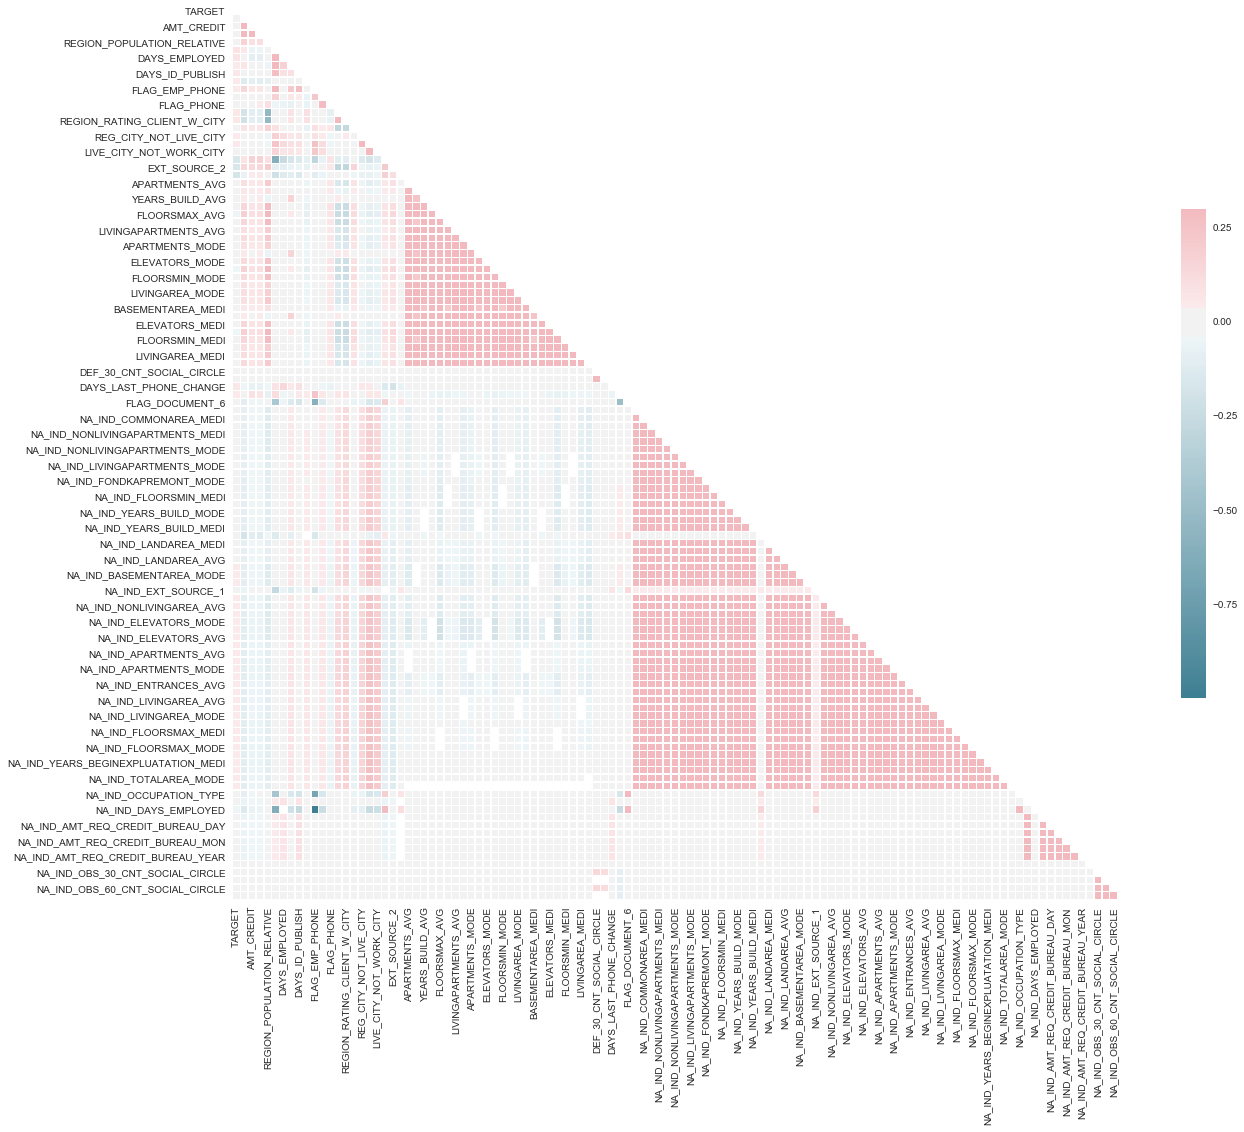

In [33]:
# Compute the correlation matrix for the new train data
corr = train_1.drop('SK_ID_CURR', axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib plane
f, ax = plt.subplots(figsize = (20, 18))

# Customise a diversing colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.margins(.02)
#plt.savefig('corr_train_1.png')
plt.show()